<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проект-&quot;Телеком&quot;" data-toc-modified-id="Проект-&quot;Телеком&quot;-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Проект "Телеком"</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Первичный-анализ" data-toc-modified-id="Первичный-анализ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Первичный анализ</a></span></li><li><span><a href="#Предобработка-и-исследовательский-анализ" data-toc-modified-id="Предобработка-и-исследовательский-анализ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка и исследовательский анализ</a></span></li><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка к обучению</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование-и-результаты" data-toc-modified-id="Тестирование-и-результаты-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Тестирование и результаты</a></span></li><li><span><a href="#Вывод-по-проекту" data-toc-modified-id="Вывод-по-проекту-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Вывод по проекту</a></span></li><li><span><a href="#ОТЧЕТ-ПО-РАБОТЕ" data-toc-modified-id="ОТЧЕТ-ПО-РАБОТЕ-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>ОТЧЕТ ПО РАБОТЕ</a></span></li></ul></li></ul></div>

## Проект "Телеком"

### Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**ОПИСАНИЕ УСЛУГ**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**ОПИСАНИЕ ДАННЫХ**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

**ЦЕЛЬ ПРОЕКТА** - построить прототип модели машинного обучения для прогнозирования ухода клиента из компании.

**ПЛАН РАБОТЫ:**

- провести предобработку данных: 
  - изменить типы данных некоторых признаков;
  - сгенерировать целевой и новые признаки;
  - удалить неинформативные признаки;
  - проверить каждый признак на пропуски/выбросы/аномалии/пустые значения и устранить их;
- провести исследовательский анализ;
- объединить таблицы;
- проверить корреляции визуальным методом, в случае обнаружения высоких значений удалить лишние признаки;
- подготовить данные к обучению: разделить на трейн и тест, проверить уровень дисбаланса классов, в случае высокого значения устранить его для линейных моделей, кодировать и масштабировать численные и категориальные фичи;
- провести обучение моделей с подбором параметров, провести тест на модели с лучшим значением метрики, написать выводы.

### Первичный анализ

установим доп библиотеки и обновим существующие

In [1]:
# !pip install phik
# !pip install -U scikit-learn
# !pip install lightgbm
# !pip install catboost

In [2]:
import time
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")
from phik.report import plot_correlation_matrix

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (
    accuracy_score,
    recall_score, 
    precision_score,
    f1_score, 
    roc_auc_score, 
    roc_curve,
    classification_report
)

warnings.filterwarnings('ignore')
RS=130323

Отдельной переменной вывел путь к файлу, чтобы при смене устройства поменять путь с учетом наличия на нем исходников. 
Для каждого файла пропишем связку для чтения таким образом, чтобы файлы считались либо при работе в тренажере, либо при работае в локальной тетради путем прописывания пути к файлу вручную

In [3]:
file_path = 'C:/Users/uber4/OneDrive/Рабочий стол/final_provider/final_provider/'

try:
    contract = pd.read_csv(file_path+'contract.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    
try:
    personal = pd.read_csv(file_path+'personal.csv')
except:
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    
try:
    internet = pd.read_csv(file_path+'internet.csv')
except:
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    
try:
    phone = pd.read_csv(file_path+'phone.csv')
except:
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

Проведем разведывательный анализ данных

In [4]:
for i,j in zip((contract, personal, internet, phone),
               ('CONTRACT', 'PERSONAL', 'INTERNET', 'PHONE')):
    print('*'*30,j,'*'*30)
    print()
    display(i.head(3))
    print('-'*25,'INFO','-'*25)
    print()
    print(i.info())
    print()
    print('-'*10,'NAN','-'*10)
    print()
    print(i.isna().sum())
    print()
    print('-'*5,'DUPLICATED','-'*5)
    print(i.duplicated().sum())
    print()
    print('-'*25,'UNIQUE VALUES','-'*25)
    for k in i.columns:
        print(k)
        print(i[k].unique())
        print('-'*25)
    print()

****************************** CONTRACT ******************************



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

---------- NAN ----------

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

----- DUPLICATED -----
0

------------------------- UNIQUE VALUES -----------------------

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

---------- NAN ----------

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

----- DUPLICATED -----
0

------------------------- UNIQUE VALUES -------------------------
customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-------------------------
gender
['Female' 'Male']
-------------------------
SeniorCitizen
[0 1]
-------------------------
Partner
['Yes' 'No']
---------

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

---------- NAN ----------

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

----- DUPLICATED -----
0

------------------------- UNIQUE VALUES -------------------------
customerID
['7590-V

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

---------- NAN ----------

customerID       0
MultipleLines    0
dtype: int64

----- DUPLICATED -----
0

------------------------- UNIQUE VALUES -------------------------
customerID
['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
-------------------------
MultipleLines
['No' 'Yes']
-------------------------



**Вывод по первичному анализу:**

- данные находятся в 4х таблицах разных размерностей с инофрмацией и оклиентах и пользуемыми услугами;
- согласно данным таблицы contract наблюдается разделение клиентов на 2 группы: лояльные и ушедшие;
- следует провести исследовательский анализ данных по группам клиентов для проверки наличия закономерностей;
- во всех таблицах отсутствуют пропуски и дубликаты, это упрощает предобработку данных, некоторые признаки имеют некорректный тип данных.

Изучив данные, можно скорректировать план работы. Для начала следует заметить, что ключевая информация находится в первой таблице, в остальных таблицах принцип работы будет сводиться к применению к признакам бинарной маски, т.е. приведение к числовому типу данных. Основную работу следует провести в первой таблице: привести даты к временному типу, сгенерировать целевой признак и дополнителный признак, затем можно удалить временные признаки. Далее следует применить метод describe для численных признаков, заранее изменив тип данных. Затем следут объединить таблицы, применить бинарную маску с "бинарным" признакам, заполнить пропуски, получившиеся после объединения таблиц. Исследовательский анализ данных следует проводить после объединения таблиц, т.к. после этой операции по каждому клиенту будет полная информация по персональным данным и используемым услугам.

### Предобработка и исследовательский анализ

Проверим уникальность клиентов методом выявления неявных дубликатов 

In [5]:
for i in contract.customerID:
    i = i.lower()
print(f'Количество уникальных клиентов = {len(contract.customerID.unique())}')
print(f'Количество объектов в данных   = {contract.shape[0]}')

Количество уникальных клиентов = 7043
Количество объектов в данных   = 7043


Мы убедились, что все клиенты в таблице уникальны. Приведем к числовому типу псевдочисловой столбец TotalCharges. При выполнении команды появляется ошибка, что в некоторых строках значения принимают вид ' '. Проверим эти объекты.

In [6]:
contract[contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Теперь видно, что это новые клиенты с длительной подпиской на момент выгрузки данных. Заполним пустые значения значением по признаку MonthlyCharges, т.к. на момент выгрузки данных клиент только подключился к сервису, и изменим тип признака на численный

In [7]:
# contract = contract.drop(contract[contract['TotalCharges'] == ' '].index)
for i in range(contract.shape[0]):
    if contract['TotalCharges'][i] == ' ':
        contract['TotalCharges'][i] = contract['MonthlyCharges'][i]
        
contract.TotalCharges = contract.TotalCharges.astype(float)
contract.TotalCharges.dtype

dtype('float64')

Сгенерируем целевой признак на основе признака EndDate через функцию категоризации: 0 - клиент остался, 1- клиент ушел

In [8]:
def target(date):
    if date == 'No':
        return 0
    else:
        return 1
    
contract['Left'] = contract['EndDate'].apply(target)
contract.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1


Изменим тип данных временных столбцов, предварительно заменив строковое значение No на дату выгрузки данных в признаке EndDate

In [9]:
contract.EndDate = contract.EndDate.replace('No','2020-02-01')

for i in ('BeginDate','EndDate'):
    contract[i] = pd.to_datetime(contract[i])

contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Left              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


Сгенерируем новый признак на основе временных: количество дней "жизни" клиента, затем удалим временные признаки, чтобы исключить корреляцию между ними

In [10]:
contract['TotalDaysLive'] = (contract.EndDate - contract.BeginDate).dt.days
contract = contract.drop(['BeginDate','EndDate'], axis=1)
contract.head(3)

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left,TotalDaysLive
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61


Теперь изучим статистику числовых столбцов MonthlyCharges и TotalCharges

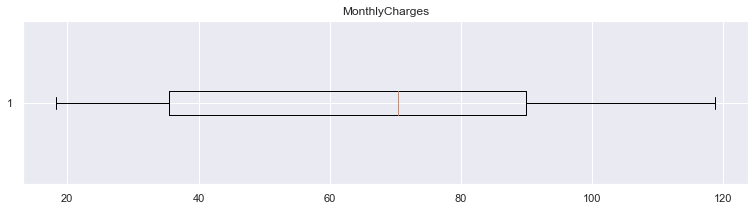

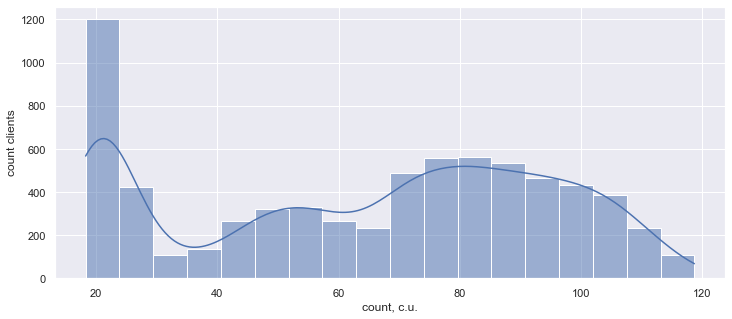

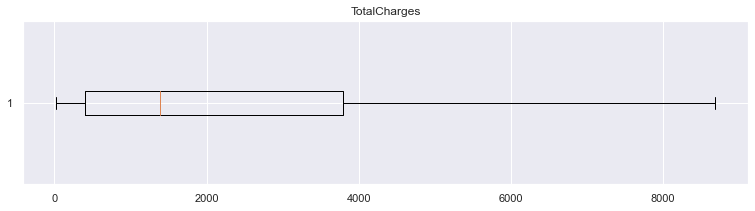

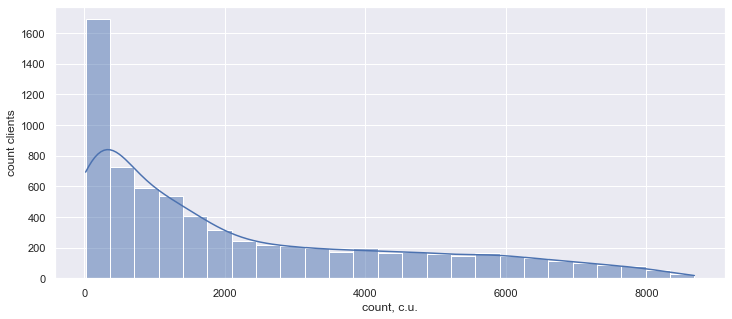

In [11]:
for i in ('MonthlyCharges','TotalCharges'):
    print()
    plt.figure(figsize=(13,3))
    plt.boxplot(contract[i], vert=False)
    plt.title(i)
    print()
    plt.figure(figsize=(12,5))
    sns.histplot(contract[i], kde=True)
    plt.grid(True)
    plt.xlabel('count, c.u.')
    plt.ylabel('count clients')
    print()
    plt.show()

Из графиков видно, что чуть меньше половины клиентов предпочитают бюджетные тарифы и услуги. На графике месячных трат наблюдается двойное (биноминальное) распределение (хотя на первый взгляд может показаться, что в левой области выбросы), из которого следует, что клиенты делятся на 2 категории: бюджетные и остальные, т.е. привязанные не к сумме платежа, а к конкретным сервисам. На графике общих платежей наблюдается стандартное распределение Гаусса со смещением вправо, что соответсвует данным первого графика: больше всего клиентов предпочитают пользоваться бюджетными тарифами и дополнительными сервисами, выбросов/аномалий в числовых признаках обнаружено не было.

Объединим таблицы и проведем исследовательский анализ остальных данных. Пропуски после объяедениения таблиц заполним значением No, т.к. пропуск означает отсутствие услуги

In [12]:
df_full = contract.merge(personal, on='customerID', how='left')\
                  .merge(internet, on='customerID', how='left')\
                  .merge(phone, on='customerID', how='left').fillna('No')
df_full.head(3)

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left,TotalDaysLive,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No


Теперь наложим бинарную маску на признаки с бинарными значениями Yes No

In [13]:
for i in df_full.columns:
    if (df_full[i].unique()[0] == 'Yes' or df_full[i].unique()[0] == 'No'):
        df_full[i] = df_full[i].map({'Yes':1,'No':0})
df_full.head(1)

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left,TotalDaysLive,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,0,31,Female,0,1,0,DSL,0,1,0,0,0,0,0


Проведем исследовательский аналих данных по группам клиентов: ушедшие и актуальные. Первый ряд графиков будет для числовых признаков, второй - для категориальных

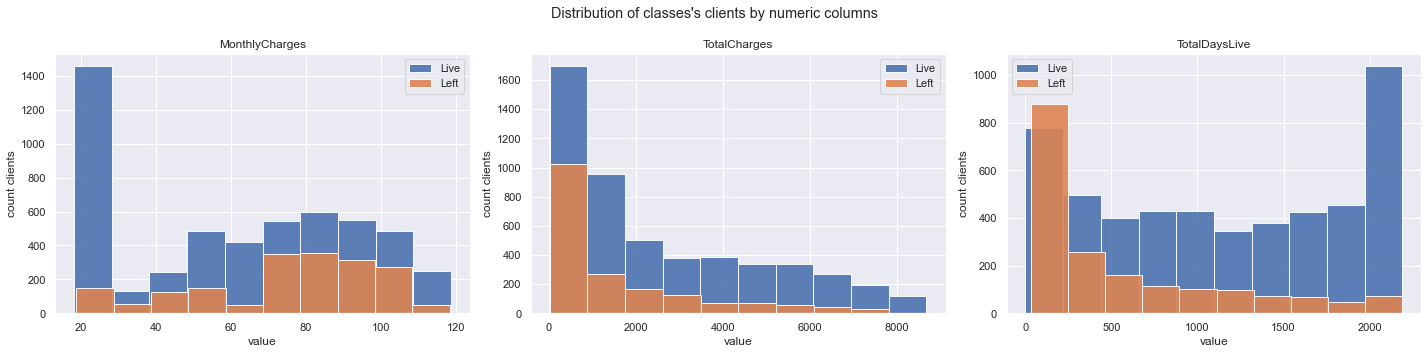

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle("Distribution of classes's clients by numeric columns")
axes = axs.ravel()

for i, col in enumerate(['MonthlyCharges','TotalCharges','TotalDaysLive']):
    
    df_full.groupby('Left')[col].plot(kind='hist', ax=axes[i], alpha=.9)
    axes[i].legend(['Live','Left'])
    axes[i].set_title(col)
    axes[i].set_ylabel('count clients')
    axes[i].set_xlabel('value')
    
plt.tight_layout()
plt.show()

**Выводы по численным графикам:**

- большему влиянию на уход подвержены клиенты с высоким ежемясячным платежом, большая часть которых имеет ежемесячную подписку;
- у большинства оставшихся клиентов ежемесячный платеж минимальный, у ушедших ежемясячный платеж был достаточно большй - в диапазоне 70-100 у.е.;
- у большинства клиентов всех категорий суммарные траты на момент выгрузки данных небольшие;
- с течением времени падает уровень ухода клиентов и ближе к концу даты выгрузки возрастает уровень новых клиентов, это говорит о росте лояльности компании к клиентам.

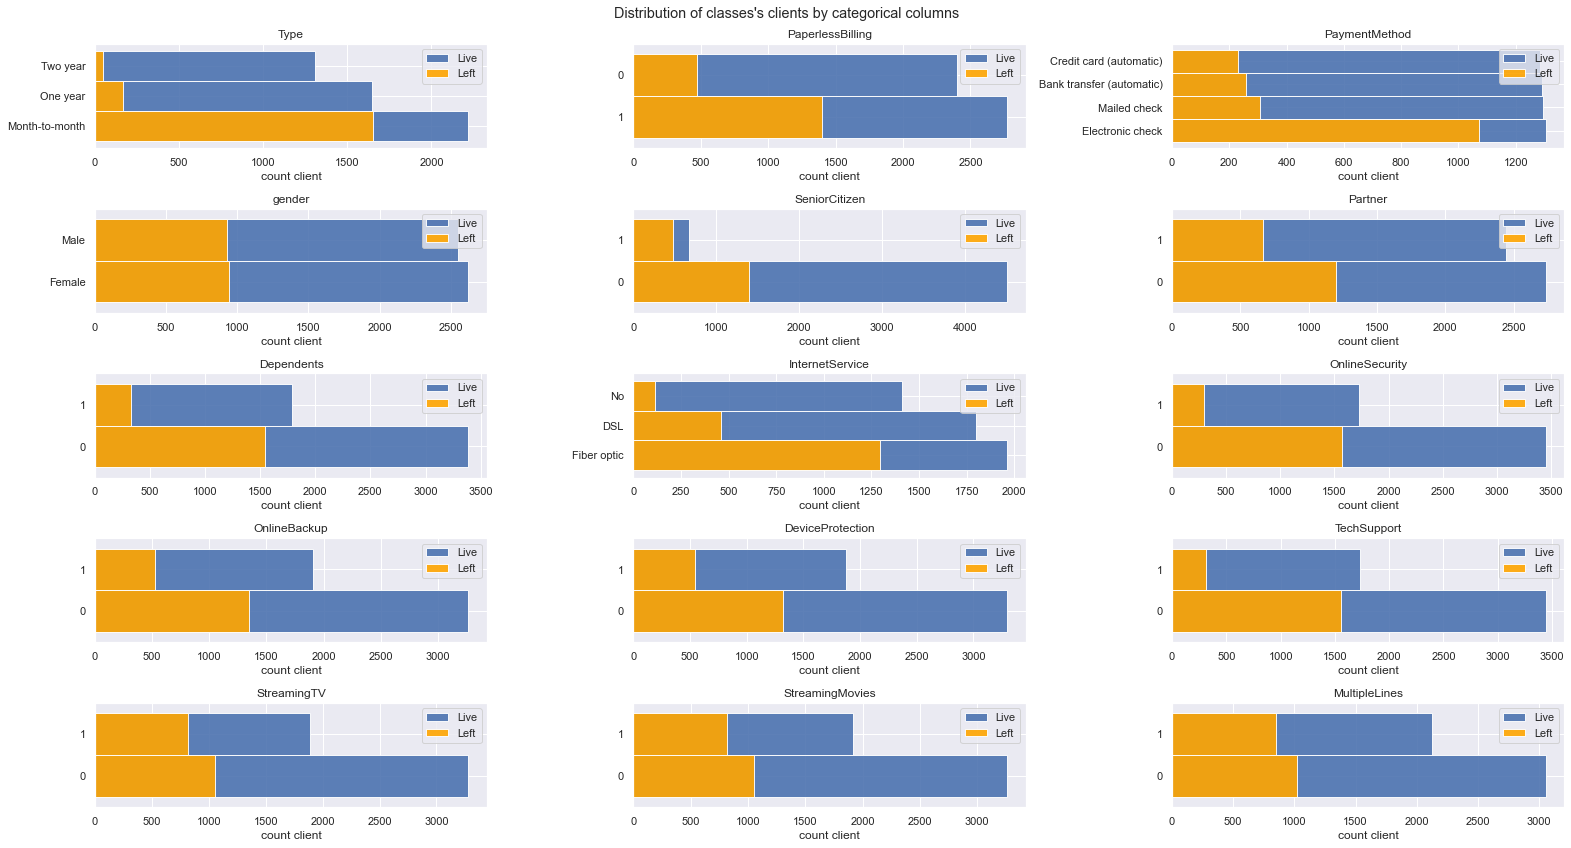

In [15]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(22,12))
fig.suptitle("Distribution of classes's clients by categorical columns")
axes = axs.ravel()

for i, col in enumerate(df_full.drop(['customerID','Left','MonthlyCharges','TotalCharges','TotalDaysLive'], axis=1).columns.to_list()):
    
    df_full[df_full['Left'] == 0][col].value_counts().plot(kind='barh', width=1, alpha=.9, ax=axes[i])
    df_full[df_full['Left'] == 1][col].value_counts().plot(kind='barh', width=1, alpha=.9, color='orange', ax=axes[i])
    axes[i].legend(['Live','Left'])
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('count clients')   
    
plt.tight_layout()
plt.show()

**Выводы по категориальным графикам:**

- подавляющая часть ушедших клиентов была подключена к тарифу с ежемесячной оплатой, предпочитают предоставление оплаты услуг в бумажном виде, оплачивают услуги в электронном виде (сайт, приложение);
- две трети ушедших клиентов - пожилые люди, для оставшихся пожилые люди - подавляющее большинство;
- среди всех клиентов примерно равное количество разных полов, большая часть которых не имеют партнера и иждивенцев;
- по остальным услугам все клиенты прямопорционально предпочитают в большинстве случаев не пользоваться дополнительными услугами.

Теперь построим график корреляции признаков

interval columns not set, guessing: ['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Left', 'TotalDaysLive', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']



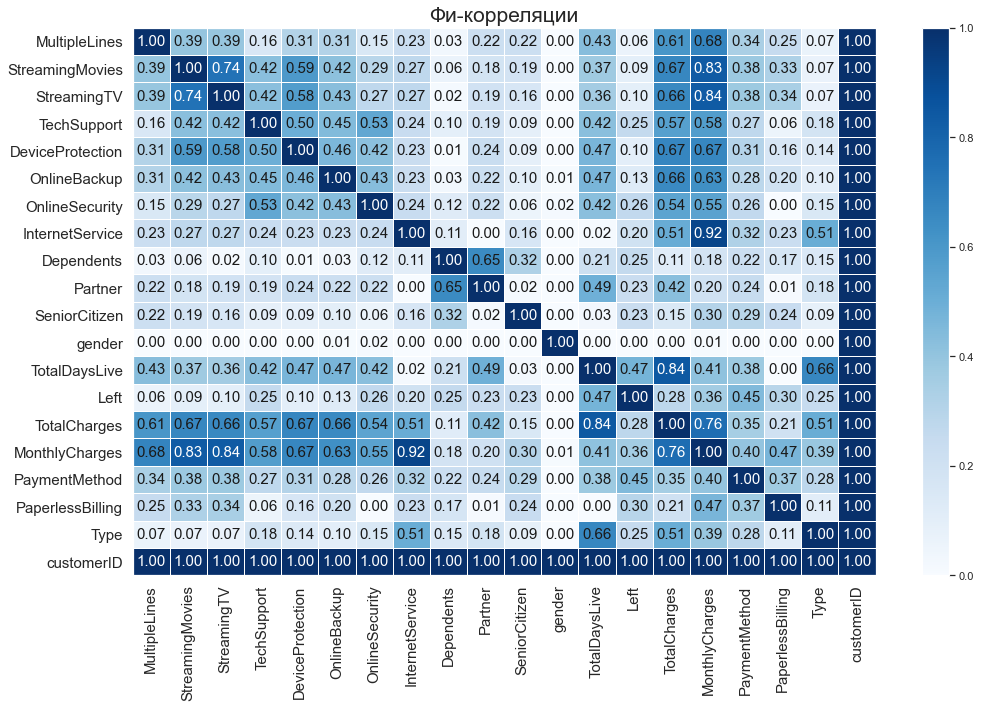

In [16]:
corr_matrix = df_full.phik_matrix()
print()
plot_correlation_matrix(corr_matrix.values, 
                        x_labels=corr_matrix.columns, 
                        y_labels=corr_matrix.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title="Фи-корреляции", 
                        fontsize_factor=1.5, 
                        figsize=(15, 10))
plt.tight_layout()

На графике наблюдается сильная корреляция признака MonthlyCharges с 4 признаками. Удалять их не будем, а проверим по итогу на лучшей модели их важность. Удалим признаки customerID, т.к. он полностью состоит из уникальных значений, и TotalCharges как высокоскоррелированный с остальными истинно-числовыми признаками.

In [17]:
df_full = df_full.drop(['customerID','TotalCharges'], axis=1)
df_full.head(1)
print(f'Размер итоговой таблицы {df_full.shape}')

Размер итоговой таблицы (7043, 18)


Проверим баланс классов

----------------------------------------
отношение классов 5174:1869
                   2.8:1
----------------------------------------


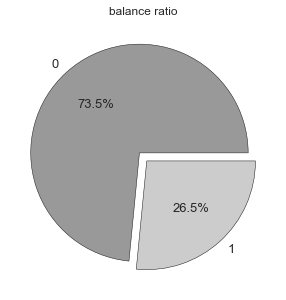

In [18]:
df_full.Left.value_counts().plot(
    kind='pie',
    title='balance ratio',
    ylabel='',
    labels=['0','1'],
    autopct='%.1f%%',
    explode=[0.05,0.05],
    figsize=(5,5),
    fontsize=13,
    wedgeprops = {'linewidth':0.5,'edgecolor':'k'},
    colors=['0.6','0.8']
);
print('-'*40)
print(f'отношение классов {df_full.Left.value_counts()[0]}:{df_full.Left.value_counts()[1]}')
print(' '*18,f'{df_full.Left.value_counts()[0]/df_full.Left.value_counts()[1]:.1f}:1')
print('-'*40)

Баланс класов незначительный, для обучения линейных моделей достаточно будет уравнять веса методом class_weight.

**Вывод по исследовательскому анализу**

Большая часть ушедших клиентов , две трети из которых пожилые люди, ушли в течение 8 месяцев пользованием услугами компании, имели достаточно большой ежемесячный платеж и выборочные дополнительные услуги. Их уход объясняется плохим информированием обо всех услугах компании и их стоимости и видимо их навязыванием или ростом цен без оповещения клиентов. Причин может быть много, но суть в том, что у компании шла на спад клиентская лояльность. Судя по данным, к концу даты их выгрузки компания поменяла свои взгляды и уровень ушедших клиентов начал падать и одновременно произошел скачок уровня новых клиентов. 

Оставшиеся клиенты в равной степени предпочитают разные типы подписки, но низкий ежемесячный платеж, что приводит к низким суммарным тратам. Больщая часть оставшихся клиентов - одинокие пожилые люди, что логично, учитывая низкий уровень трат.

**Выводы по предобработке:**

- скорректированы типы данных признаков;
- сгенерирован целевой признак и дополнительный;
- таблицы объеденены, устранены образовавшиеся пропуски;
- проведен исследовательский анализ данных на основе целевого признака;
- ряд признаков закодированы бинарной маской для удобства кодирования остальных признаков и экономии памяти на кросс-валидации;
- удалены неинформативные и сильноскореллированные объекты и признаки.

В этом пункте проведена предобработка данных. Далее готовим данные к обучению.

### Подготовка к обучению

Изменим тип данных object на category для бустингов, разделим данные на выборки и таргет

In [19]:
for i in df_full.select_dtypes('object').columns.to_list():
    df_full[i] = df_full[i].astype('category')

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Type              7043 non-null   category
 1   PaperlessBilling  7043 non-null   int64   
 2   PaymentMethod     7043 non-null   category
 3   MonthlyCharges    7043 non-null   float64 
 4   Left              7043 non-null   int64   
 5   TotalDaysLive     7043 non-null   int64   
 6   gender            7043 non-null   category
 7   SeniorCitizen     7043 non-null   int64   
 8   Partner           7043 non-null   int64   
 9   Dependents        7043 non-null   int64   
 10  InternetService   7043 non-null   category
 11  OnlineSecurity    7043 non-null   int64   
 12  OnlineBackup      7043 non-null   int64   
 13  DeviceProtection  7043 non-null   int64   
 14  TechSupport       7043 non-null   int64   
 15  StreamingTV       7043 non-null   int64   
 16  StreamingMovies   7043 n

In [20]:
X, X_test, y, y_test = train_test_split(
    df_full.drop('Left', axis=1),
    df_full['Left'],
    test_size=.25,
    stratify = df_full['Left'],
    random_state=RS)

print(f'Размер трейна: {X.shape}  {y.shape}')
print(f'Размер теста:  {X_test.shape}  {y_test.shape}')
print('-'*35)
print(f'''Распределение классов в таргете на трейне: 
{np.bincount(y)} --> [{(np.bincount(y)[1]/np.bincount(y)[0]).round(2)}:1]''')
print(f'''Распределение классов в таргете на тесте:
{np.bincount(y_test)} --> [{(np.bincount(y_test)[1]/np.bincount(y_test)[0]).round(2)}:1]''')

Размер трейна: (5282, 17)  (5282,)
Размер теста:  (1761, 17)  (1761,)
-----------------------------------
Распределение классов в таргете на трейне: 
[3880 1402] --> [0.36:1]
Распределение классов в таргете на тесте:
[1294  467] --> [0.36:1]


Таргет стратифицирован, классы распределились равномерно по таргетам в трейне и тесте. При обучении будет использована кросс-валидация. Пропишем трансформер для кодирования признаков во избежание утечки данных при трансформации выборок

In [21]:
cat = X.select_dtypes("category").columns.to_list()
num = ['MonthlyCharges','TotalDaysLive']

col_trans_lin = ColumnTransformer(
             [('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), cat),
              ('scaler', StandardScaler(), num)],
              remainder='passthrough'
)
col_trans_forest = ColumnTransformer(
             [('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), cat)],
              remainder='passthrough'
)

Объявим функцию, на вход подается модель с параметрами, на выходе метрика, лучшие параметры, лучшая модель

In [22]:
def classifier_cv(model, params):
    
    classifier = RandomizedSearchCV(
         model, 
         params, 
         cv = StratifiedKFold(5, shuffle=True, random_state=RS),
         scoring = 'roc_auc',
         n_jobs = -1,
         verbose = 10
    )
    classifier.fit(X, y)
    
    auc_cv = classifier.best_score_.round(3)  
    best_params = classifier.best_params_
    best_model = classifier.best_estimator_
    
    print('-'*23)
    print('Simulated successfully')
    print('-'*23)
    return auc_cv, best_params, best_model

### Обучение

In [23]:
%%time
pipe_lgbm = Pipeline([
    ('lgbm', LGBMClassifier(objective='binary',
                            class_weight='balanced',
                            random_state=RS)),
])
params_lgbm = {
    'lgbm__n_estimators':range(100,1001,100),
    'lgbm__max_depth':range(5,26,5),
    'lgbm__learning_rate':[0.01,0.1,0.5],
    'lgbm__num_leaves':range(10,51,5)
}
lgbm_auc_cv, lgbm_best_params, lgbm_best_model = classifier_cv(
    pipe_lgbm, 
    params_lgbm
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-----------------------
Simulated successfully
-----------------------
CPU times: total: 1.58 s
Wall time: 22.1 s


In [24]:
%%time
pipe_rf = Pipeline([
    ('transformer_forest', col_trans_forest),
    ('rf', RandomForestClassifier(random_state=RS))
    
])
params_rf = {
    'rf__n_estimators':range(100,1001,100),
    'rf__max_depth':range(5,26,5),
    'rf__min_samples_split':range(2,7),
    'rf__min_samples_leaf':range(2,7),
    'rf__criterion':['gini','entropy','log_loss']
}
rf_auc_cv, rf_best_params, rf_best_model = classifier_cv(
    pipe_rf, 
    params_rf
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-----------------------
Simulated successfully
-----------------------
CPU times: total: 9.59 s
Wall time: 44.9 s


In [25]:
%%time
pipe_lr = Pipeline([
    ('transformer_lin', col_trans_lin),
    ('logreg', LogisticRegression(class_weight='balanced',random_state=RS))
])
params_lr = {
    'logreg__C':range(1,10),
    'logreg__solver':['lbfgs','liblinear','newton-cg'],
    'logreg__penalty':['l1','l2','elasticnet']
}

lr_auc_cv, lr_best_params, lr_best_model = classifier_cv(
    pipe_lr, 
    params_lr
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-----------------------
Simulated successfully
-----------------------
CPU times: total: 391 ms
Wall time: 1.47 s


In [26]:
%%time
pipe_catb = Pipeline([
    ('catb', CatBoostClassifier(cat_features=cat,
                                eval_metric ='AUC',
                                verbose=False,
                                random_state=RS))
])
params_catb = {
    'catb__iterations':[900],#range(500,1001,100),
    'catb__depth':[5],#[5,10, 15],
    'catb__learning_rate':[0.1]#[0.1, 0.5]
}
catb_auc_cv, catb_best_params, catb_best_model = classifier_cv(
    pipe_catb, 
    params_catb,
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-----------------------
Simulated successfully
-----------------------
CPU times: total: 1min 23s
Wall time: 1min 14s


выведем результаты обучения

In [27]:
pd.DataFrame({
    'LogigsticRegression':lr_auc_cv,
    'RandomForest':rf_auc_cv,
    'LGBM':lgbm_auc_cv,
    'CatBoost':catb_auc_cv
    },
    index=['roc-auc cv']
)

,LogigsticRegression,RandomForest,LGBM,CatBoost
roc-auc cv,0.837,0.852,0.898,0.92


Лучшее значение метрики на кросс-валидации показала модель CatBoost. Проведем для этой модели тестирование.

### Тестирование и результаты

Проведем тестирование лучшей модели

In [28]:
roc_auc_score(y_test, catb_best_model.predict_proba(X_test)[:, 1]).round(3)

0.937

Тест лучшей модели выдал результат 0.937. Данное значение превышает установленный минимальный порог метрки в 0.85. Теперь выведем результаты по работе лучшей модели.

*********** CATBOOST METRICS ***********



,accuracy,precision,recall,f1,roc-auc
CatBoost CV,0.942,0.942,0.834,0.885,0.920
CatBoost Test,0.891,0.850,0.715,0.777,0.937



      ************ CLASSIFICATION REPORT ************

              precision    recall  f1-score   support

      Left_0       0.90      0.95      0.93      1294
      Left_1       0.85      0.72      0.78       467

    accuracy                           0.89      1761
   macro avg       0.88      0.83      0.85      1761
weighted avg       0.89      0.89      0.89      1761


      ***************************** CATBOOST ROC-CURVE *****************************



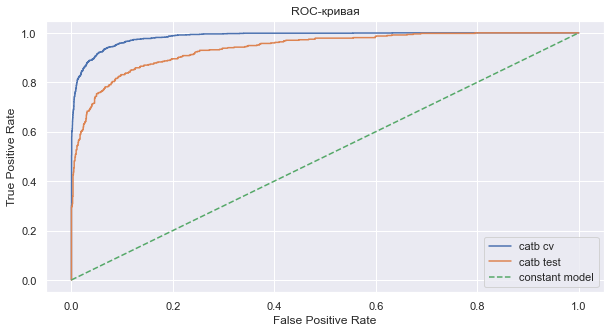


             ************************ CATBOOST FEATURES IMPORTANCES ************************



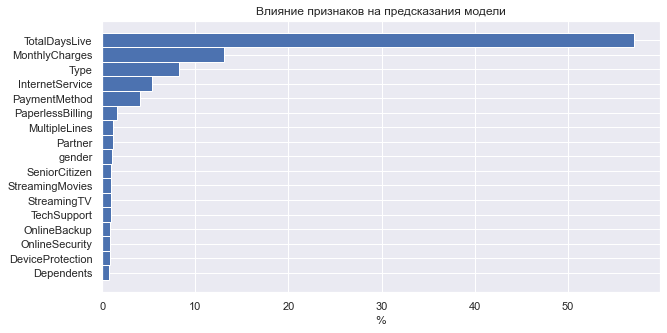

In [34]:
''' реализуем вывод всех метрик '''

print('*'*13,'CATBOOST METRICS','*'*13)
print()
display(pd.DataFrame({
    'accuracy':[accuracy_score(y, catb_best_model.predict(X)).round(3),
                accuracy_score(y_test, catb_best_model.predict(X_test)).round(3)],
    'precision':[precision_score(y, catb_best_model.predict(X)).round(3),
                 precision_score(y_test, catb_best_model.predict(X_test)).round(3)],
    'recall':[recall_score(y, catb_best_model.predict(X)).round(3),
              recall_score(y_test, catb_best_model.predict(X_test)).round(3)],
    'f1':[f1_score(y, catb_best_model.predict(X)).round(3),
          f1_score(y_test, catb_best_model.predict(X_test)).round(3)],
    'roc-auc':[catb_auc_cv, 
               roc_auc_score(y_test, catb_best_model.predict_proba(X_test)[:, 1]).round(3)],
    },
    index=['CatBoost CV','CatBoost Test']
))
print()

''' отчет о классификации '''

print(' '*5,'*'*12,'CLASSIFICATION REPORT','*'*12)
print()
print(classification_report(y_test, catb_best_model.predict(X_test), target_names=['Left_0', 'Left_1']))
print()

''' реализуем график roc-кривой для cv и test '''

print(' '*5,'*'*29,'CATBOOST ROC-CURVE','*'*29)
print()
plt.figure(figsize=(10,5))
def visual_roc_curve(title, best_model, X_set, y_set):

    probabilities = best_model.predict_proba(X_set)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_set, probabilities)
    plt.plot(fpr, tpr, label=title)

visual_roc_curve('catb cv',catb_best_model, X, y)
visual_roc_curve('catb test',catb_best_model, X_test, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', label='constant model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()
print()

''' реализуем график features importance '''

print(' '*12,'*'*24,'CATBOOST FEATURES IMPORTANCES','*'*24)
print()
catb = CatBoostClassifier(cat_features = cat,
                          eval_metric ='AUC',
                          verbose = False,
                          random_state = RS,
                          iterations = 900,
                          depth = 5,
                          learning_rate = 0.1).fit(X,y)

feature_sort = catb.get_feature_importance().argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[feature_sort], catb.get_feature_importance()[feature_sort], height=1)
plt.title('Влияние признаков на предсказания модели')
plt.xlabel('%')
plt.show()

### Вывод по проекту

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

В первую очередь был проведен первичный анализ данных, затем поставлена цель, разработан план работ. Первичный анализ показал, что данные корректны, за исключением некорректного типа данных одного признака. Далее были проведены исследовательский аналих и предобработка данных: устранен технический баг, сгенерированы целевой и дополнительный признак, визуализированы и описаны взаимосвязи в данных для обоих групп типов клиентов, все данные объеденены в одну таблицу, выведен график корреляций, удалены неинформативные признаки. Далее данные были подготовлены к обучению. Для обучения были выбраны 4 модели: стандартная, линейная и представители бустинга. Модели бустинга показали самый высокий результат на обучающих данных. Для лучшей модели было проведено тестирование, где было достигнуто высокое качество предсказания по заданной метрике на тестовых данных. 

Финальная модель отображает истинную и постоянную способность к прогнозированию, имеет на выходе достаточно высокие показатели метрик предсказания расторжения договора клиента с компанией. На графике CATBOOST FEATURES IMPORTANCES изображено влияние признаков на целевой признак. На нем видно, что на целевой признак в первую очередь оказывает влияние "срок жизни" клиента, во вторую очередь - ежемесячные траты, тип подписки и способ оплаты выставленного счета, остальные признаки оказывают слабо выраженное влияние.

Цель проекта - построить прототип модели машинного обучения для прогнозирования ухода клиента из компании, - выполнена. Прототип следует проверить на дополнительных данных, доработать и адаптировать на платформе заказчика.

### ОТЧЕТ ПО ПРОЕКТУ

Нам были предоставлены данные в виде 4 таблиц: *contract, personal, internet, phone*. В первую очередь был составлен предварительный план работ и проведен ***первичный анализ данных***: по каждой таблице вывели информацию о признаках, размер таблицы, количество пропусков и дуликатов, уникальные значения каждого признака. По итогу первичного анализа было выявлено, что таблицы разных размеров, что говорит о появлении пропусков при их объединении, в таблицах отсутствуют пропуски и дубликаты, некоторые из признаков имеют некорректный тип данных. Предварительный план был скорректировани пошагово подробно расписан.

Следующий этап - ***предобработка и исследовательский анализ данных***. Два этапа были соединены в один, т.к. было выяснено, что основная информация содержится в таблице *contract* и большая часть работ будет выполнена именно здесь, а также анализ стоит проводить последовательно порядку следования признаков, чтобы не запутаться и не совершить ошибку. Было проверено количество уникальных значений ID клиентов, чтобы исключить неявные дубликаты. Далее в таблице был изменен тип признака *TotalCharges* со строкового на численный, предварительно устранив ошибку в виде пустых значений некоторых объектов путем их удаления из таблицы. Признаки *BeginDate* и *EndDate* были приведены к временному типу для генерации целевого признака *Left* - количества "дней жизни" клиента в компании, именно это значение будет прогнозироваться. При приведении признака *EndDate* к временному типу для всех значений *No* (клиент пользуется услугами компании) была сделана замена на значение *01-02-2016* - дата выгрузки данных. Дополнительно был сгенерирован признак *TotalDaysLive* из ранее указаных временных признаков, после чего они были удалены для исключения их корреляции с новым признаком, т.к. он содержит информацию о разнице временных признаков в более удобном для обучения моделей виде. Далее был проведен промежуточный исследовательский анализ численных признаков *TotalCharges* *MonthlyCharges* для описания выявленных закономерностей и распределений в ценовых диапазонах. На этом работа с сновной таблицей была закончена, было произведено объединение таблиц, образовавшиеся пропуски были заполнены значением No, т.е. отсуствие услуги для клиента. Для удобства подготовки данных для обучения на категориальные признаки была наложена бинарная маска для перевода значений в численные 0 и 1. Далее был доведен до конца исследовательский анализ данных: построены графики для численных и категориальных признаков для описания наблюдений поведения клиентов по группам - оставшиеся и ушедшие. Был построен график дисбаланса классов, выявлено отношение классов 1 к 3, принято решение использовать уравнение весов классов методом class_weight для линейных моделей в гиперпараметрах. В конце были построены графики корреляций, по итогу которых был удален признак *TotalCharges*, т.к. у него была самая высокая корреляция по отношению к другим численным признакам. Категориальные признаки с выоской корреляцией были оставлены, т.к. было принято решение проверить их значимость на лучшей модели. На этом этап предобработки и исследовательского анализа данных завершен.

Следующий этап - ***подготовка данных к обучению***. Признаки с типом данным object были приведены к типу category для корректной работы моделей градиентного бустинга. Данные были разделены на обучающую (трейн) и тестовую (тест) выборки в отношении 75:25, значение переменной random_state было взято равным 130323 - дата начала работы над проектом, таргет стратифицирован, проверено распределение объектов разных классов по таргетам на трейне и тесте. Для обучения предполагалось использовать пайплайн, поэтому был предварительно создан трансформер для кодирования (OneHotEncoder - OHE) и масштабирования (StandardScaler - SS) признаков для "деревянных" и линейных моделей: "деревянные" модели - OHE, линейные - OHE и SS. В обучении учавствовали все принаки: численные - *MоnthlyCharges*, категориальные - *Type, Gender, PaymentMethod, InternetService* и оставшиеся категориальные бинарные (все оставшиеся). В коцне этап была объявлена функция, которая на вход принимает название модели и ее параметры, на выходе выводит в отдельные переменные значение объявленной метрики, лучшие параметры и лучшую модель на кросс-валидации.

Следующий этап - ***обучение моделей***. На этом этапе было испробовано 4 модели: LogisticRegression, Random Forest, LGBM, CatBoost. Для каждой модели был приозведен перебор по сетке параметров, по итогу работы функции лучшее значение метрики показала модель

*CatBoost с гиперпараметрами eval_metric ='AUC', verbose = False, random_state = 130323, iterations = 900, depth = 5, learning_rate = 0.1*

Заключительный этап - ***тестирование***. На этом этапе было проведено тестирование лучшей модели, построение графика roc-кривой и вывод важности признаков. 

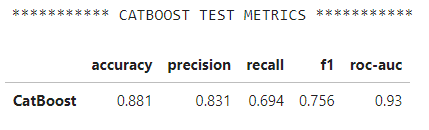
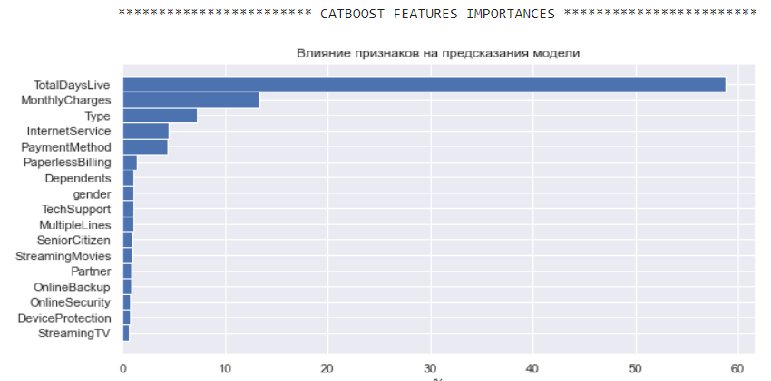

Лучшая модель показала высокое значение метрики на тесте равным 0.937. Для анализа полученных результатов были выведены также дополнительные метрики *precision, recall, f1-mera, accuracy*. Recall показывает, что модель распознает 83% ушедших клиентов среди действительно ушедших, Precision - что модель распознает 69% ушедших клиентов среди всех клиентов. F1-mera показывает среднегармоническое между precision и recaal, т.е. баланс между ними, не зависит от дисбаланса классов. ROC-AUC, которая показывает среднегармоническое между истинно положительными показателями (TPR) и ложноположительными показателями (FPR), показывает достаточно высокое значение 93%.

В ходе выполнения проекта трудностей не возникло, т.к. залогом его успешного выполнения является хорошо проработанный и подробный план, который был скорректрован по результатам предварительного анализа. По итогу работы над проектом все пройденные этапы оказались важны, т.к. некорректная работа хотя бы одного из них дала бы либо сбой, либо низкое значение метрики. Проект завершен.